# Facial Keypoint Localization - Exploratory Data Analysis 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split

## Dataset struture

Firstly, let's import the dataset into a dataframe and look at its shape, types and characteristics.

In [ ]:
train_data = pd.read_csv("training.csv")
train_data.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


Now that the dataset is loaded, let's examine data types of the columns.

In [ ]:
train_data.dtypes

left_eye_center_x            float64
left_eye_center_y            float64
right_eye_center_x           float64
right_eye_center_y           float64
left_eye_inner_corner_x      float64
left_eye_inner_corner_y      float64
left_eye_outer_corner_x      float64
left_eye_outer_corner_y      float64
right_eye_inner_corner_x     float64
right_eye_inner_corner_y     float64
right_eye_outer_corner_x     float64
right_eye_outer_corner_y     float64
left_eyebrow_inner_end_x     float64
left_eyebrow_inner_end_y     float64
left_eyebrow_outer_end_x     float64
left_eyebrow_outer_end_y     float64
right_eyebrow_inner_end_x    float64
right_eyebrow_inner_end_y    float64
right_eyebrow_outer_end_x    float64
right_eyebrow_outer_end_y    float64
nose_tip_x                   float64
nose_tip_y                   float64
mouth_left_corner_x          float64
mouth_left_corner_y          float64
mouth_right_corner_x         float64
mouth_right_corner_y         float64
mouth_center_top_lip_x       float64
m

In [ ]:
numerical_columns = list(train_data.columns)
numerical_columns.remove("Image")
print("Numerical columns: ", numerical_columns)

print()
image_column = ["Image"]
print("Image column: ", image_column)

Numerical columns:  ['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x', 'right_eye_center_y', 'left_eye_inner_corner_x', 'left_eye_inner_corner_y', 'left_eye_outer_corner_x', 'left_eye_outer_corner_y', 'right_eye_inner_corner_x', 'right_eye_inner_corner_y', 'right_eye_outer_corner_x', 'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x', 'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x', 'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x', 'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x', 'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y', 'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x', 'mouth_right_corner_y', 'mouth_center_top_lip_x', 'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y']

Image column:  ['Image']


All columns are numerical, except the last one. First 30 columns represent a coordinates for 15 facial keypoints. Last column is an array of integer values - pixels of an associated image. To display this image we need to implement a function that will split the string, make it a numerical 2D array of 96x96 pixels and plot it. The image has only one channel, hence it's grayscale.

In [ ]:
def getImage(image):
    pixel_values = image.split(' ')
    pixel_values = [int(pixel) for pixel in pixel_values]
    image = np.array(pixel_values, dtype=np.uint8).reshape(96, 96)
    return image

This function will make 2D numpy array out of string integer list input. Let's look at 10 random samples

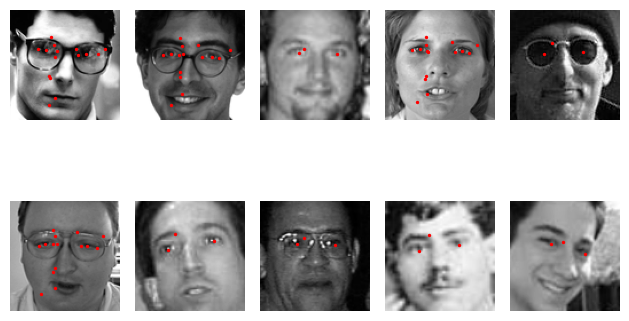

In [ ]:
random_samples = train_data.sample(10)

fig, ax = plt.subplots(2, 5)
for i in range(10):
    image = getImage(random_samples.iloc[i]["Image"])
    ax[i // 5, i % 5].imshow(image, cmap='gray')
    x_coords = [random_samples.iloc[i][j] for j in range(15)]
    y_coords = [random_samples.iloc[i][j+1] for j in range(15)]
    ax[i // 5, i % 5].scatter(x_coords, y_coords, c='r', marker='o', s=2)
    ax[i // 5, i % 5].axis('off')

plt.tight_layout()
plt.show()

Already in these random samples, we see that our dataset is incomplete. Let's look at number of missing values.

In [ ]:
train_data.isna().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

It seems like we have a lot of missing values, more than 50% of the dataset. We will have to think how to train this appropriately. The only keypoint without missing values is nose tip. Eye centers and mouth centers are also missing in only few examples. Other keypoints miss in most of the dataset.


Let's look at the average position of each keypoint.

In [ ]:
# mean for each coordinate
keypoint_means = train_data[numerical_columns].mean()

# makes x and y coordinates list, names are column names without last 2 characters
x = list(96 - keypoint_means[::2])
y = list(96 - keypoint_means[1::2])
names = numerical_columns[::2]
names = [name[:-2] for name in names]

# plotly graph
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=x,
    y=y,
    mode='markers',
    text=names,
    marker=dict(size=10),
))
fig.update_layout(
    xaxis=dict(range=[0, 96]),
    yaxis=dict(range=[0, 96]),
    width=500,
    height=500,
    title="Mean position of keypoint"
)

As the plot is nicely interactive, we can see that the average point position is really resembling a face. Two eyes, nose and mouth can be seen in correct positions. Let's look at the histograms of coordinates.


In [ ]:
names = [name[:-2] for name in numerical_columns[::2]]
fig = make_subplots(rows=8, cols=2, subplot_titles=names)

for i in range(0, len(numerical_columns)//2):
    fig.add_trace(
        go.Histogram(x = train_data[numerical_columns[2*i]], name = numerical_columns[2*i]),
        row = i // 2 + 1, col = i % 2 + 1
    )
    fig.add_trace(
        go.Histogram(x = train_data[numerical_columns[2*i+1]], name = numerical_columns[2*i+1]),
        row = i // 2 + 1, col = i % 2 + 1
    )

# Update layout
fig.update_layout(title_text="Histograms in Subplots", height = 1200)

# Dataset split

Because the dataset comes with already split of train - test in ratio of 70%:30%. We need validation set and hence we will split the test set in half, the final ratio will be 70%:15%:15%.

In [ ]:
train_split, rest_split = train_test_split(train_data, test_size = 0.3)

In [ ]:
train_split.shape

(4934, 31)

In [ ]:
rest_split.shape

(2115, 31)

In [ ]:
validation_split, test_split = train_test_split(rest_split, test_size = 0.5)

In [ ]:
validation_split.shape

(1057, 31)

In [ ]:
test_split.shape

(1058, 31)

In [ ]:
test_split

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
6547,65.751443,33.966261,28.097739,32.869565,NaN,NaN,NaN,NaN,NaN,NaN,...,67.964243,NaN,NaN,NaN,NaN,NaN,NaN,43.817113,81.855861,89 81 61 47 37 29 27 25 28 31 33 34 38 42 47 5...
5355,67.771870,34.974312,28.700341,36.591070,NaN,NaN,NaN,NaN,NaN,NaN,...,55.722657,NaN,NaN,NaN,NaN,NaN,NaN,48.101371,67.309404,5 17 11 7 10 14 15 13 17 12 8 18 44 81 106 133...
218,65.846557,39.525246,30.680131,38.821770,58.813377,40.931672,72.411279,40.462689,37.713311,40.931672,...,58.855344,62.564721,81.255869,30.914623,80.318426,46.366951,76.487869,45.918951,85.710689,78 91 109 109 109 100 95 95 66 47 39 35 40 39 ...
6200,65.834096,37.999639,36.749246,31.767211,NaN,NaN,NaN,NaN,NaN,NaN,...,65.006873,NaN,NaN,NaN,NaN,NaN,NaN,43.241388,77.991211,39 38 38 37 36 36 37 38 42 39 31 18 16 24 35 4...
2741,62.738335,37.545263,30.207075,44.732497,NaN,NaN,NaN,NaN,NaN,NaN,...,62.422106,NaN,NaN,NaN,NaN,NaN,NaN,50.491278,75.817323,150 150 153 156 166 183 199 199 198 191 172 15...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3724,64.707572,34.391152,31.381730,38.867766,NaN,NaN,NaN,NaN,NaN,NaN,...,62.245686,NaN,NaN,NaN,NaN,NaN,NaN,50.780428,73.188525,12 12 13 13 17 21 19 17 14 11 8 6 4 4 4 5 7 9 ...
6649,67.552117,41.148000,30.662215,36.750535,NaN,NaN,NaN,NaN,NaN,NaN,...,64.845489,NaN,NaN,NaN,NaN,NaN,NaN,47.030585,79.015108,30 32 35 31 23 22 21 32 41 38 38 39 49 70 76 7...
1327,64.794504,39.382351,30.064489,38.714382,57.781740,41.052092,73.143206,40.384122,37.411053,40.384122,...,63.092519,64.126901,81.459298,31.066260,82.127267,47.763298,75.114504,48.097466,89.140031,38 34 32 31 29 26 25 26 26 26 28 29 28 28 29 2...
4500,72.537438,36.466592,28.849884,39.730592,NaN,NaN,NaN,NaN,NaN,NaN,...,65.089458,NaN,NaN,NaN,NaN,NaN,NaN,48.685043,75.383696,175 168 156 168 204 205 194 225 248 252 251 24...


In [ ]:
train_split.to_csv("trainData.csv", index=False)
validation_split.to_csv("valData.csv", index=False)
test_split.to_csv("testData.csv", index=False)